In [1]:
# import libraries for working with arrays and DataFrames
import numpy as np
import pandas as pd
# import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# import functions for retrieving and cleaning telco dataset
from prepare import wrangle

In [2]:
train, validate, test = wrangle()

opening data from file


In [3]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_automatic,payment_type_electronic_check,payment_type_mailed_check
1843,2676-ISHSF,Male,0,0,0,1,1,No,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
5717,8050-XGRVL,Female,0,1,1,62,1,No,Yes,No,...,0,0,0,1,0,0,0,1,0,0
1083,1576-PFZIW,Male,1,1,0,70,1,No,Yes,Yes,...,1,0,1,0,1,1,0,1,0,0
5210,7328-OWMOM,Female,0,0,1,31,1,No,No internet service,No internet service,...,0,1,0,1,0,0,1,1,0,0
2475,3541-ZNUHK,Female,0,1,1,55,1,Yes,Yes,Yes,...,0,0,0,0,0,1,0,0,1,0


In [4]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'gender_male', 'multiple_lines_no_phone_service',
       'multiple_lines_yes', 'online_security_no_internet_service',
       'online_security_yes', 'online_backup_no_internet_service',
       'online_backup_yes', 'device_protection_no_internet_service',
       'device_protection_yes', 'tech_support_no_internet_service',
       'tech_support_yes', 'streaming_tv_no_internet_service',
       'streaming_tv_yes', 'streaming_movies_no_internet_service',
       'streaming_movies_yes', 'contract_type_one_year',
       'contract_type_two_year', 'internet_service_type_fiber_optic',
       'internet_service_type_non

In [11]:
train.columns[train.dtypes == 'O']

Index(['customer_id', 'gender', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

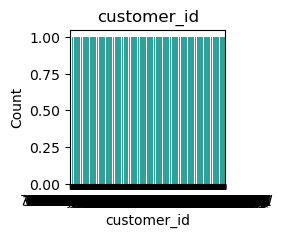

           customer_id  Count  Percent
2676-ISHSF  2676-ISHSF      1     0.03
3466-WAESX  8050-XGRVL      1     0.03
3359-DSRKA  1576-PFZIW      1     0.03
6145-NNPNO  7328-OWMOM      1     0.03
9448-REEVD  3541-ZNUHK      1     0.03
...                ...    ...      ...
3298-QEICA  5839-SUYVZ      1     0.03
5908-QMGOE  1078-TDCRN      1     0.03
9300-AGZNL  3249-VHRIP      1     0.03
7315-WYOAW  9419-IPPBE      1     0.03
7838-LAZFO  7838-LAZFO      1     0.03

[3943 rows x 3 columns]
_________________________________________________________________


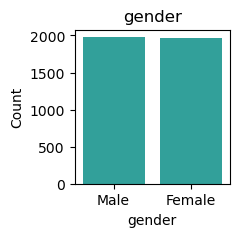

        gender  Count  Percent
Male      Male   1979    50.19
Female  Female   1964    49.81
_________________________________________________________________


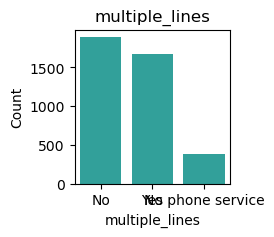

                    multiple_lines  Count  Percent
No                              No   1892    47.98
Yes                            Yes   1667    42.28
No phone service  No phone service    384     9.74
_________________________________________________________________


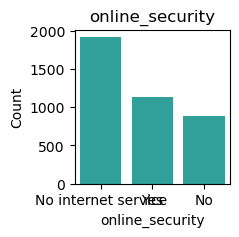

                         online_security  Count  Percent
No                   No internet service   1920    48.69
Yes                                  Yes   1139    28.89
No internet service                   No    884    22.42
_________________________________________________________________


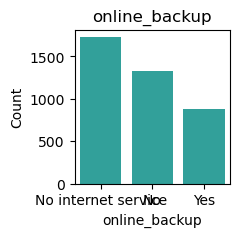

                           online_backup  Count  Percent
No                   No internet service   1729    43.85
Yes                                   No   1330    33.73
No internet service                  Yes    884    22.42
_________________________________________________________________


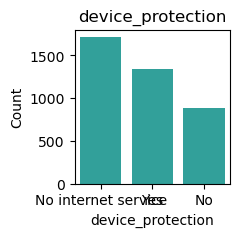

                       device_protection  Count  Percent
No                   No internet service   1715    43.49
Yes                                  Yes   1344    34.09
No internet service                   No    884    22.42
_________________________________________________________________


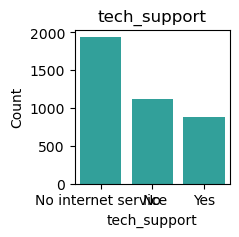

                            tech_support  Count  Percent
No                   No internet service   1940    49.20
Yes                                   No   1119    28.38
No internet service                  Yes    884    22.42
_________________________________________________________________


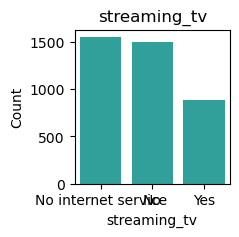

                            streaming_tv  Count  Percent
No                   No internet service   1554    39.41
Yes                                   No   1505    38.17
No internet service                  Yes    884    22.42
_________________________________________________________________


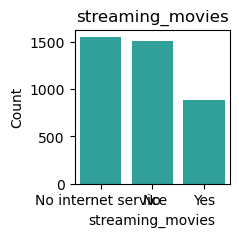

                        streaming_movies  Count  Percent
No                   No internet service   1553    39.39
Yes                                   No   1506    38.19
No internet service                  Yes    884    22.42
_________________________________________________________________


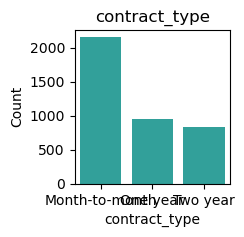

                 contract_type  Count  Percent
Month-to-month  Month-to-month   2155    54.65
Two year              One year    956    24.25
One year              Two year    832    21.10
_________________________________________________________________


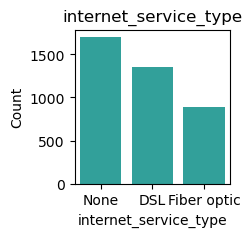

            internet_service_type  Count  Percent
Fiber optic                  None   1703    43.19
DSL                           DSL   1356    34.39
None                  Fiber optic    884    22.42
_________________________________________________________________


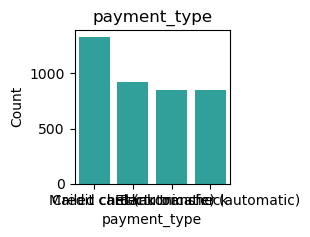

                                        payment_type  Count  Percent
Electronic check                        Mailed check   1329    33.71
Mailed check                 Credit card (automatic)    919    23.31
Credit card (automatic)             Electronic check    849    21.53
Bank transfer (automatic)  Bank transfer (automatic)    846    21.46
_________________________________________________________________


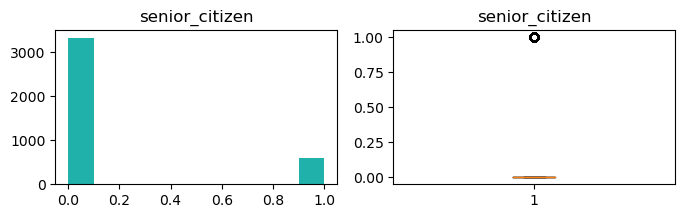

count    3943.000000
mean        0.153436
std         0.360453
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: senior_citizen, dtype: float64


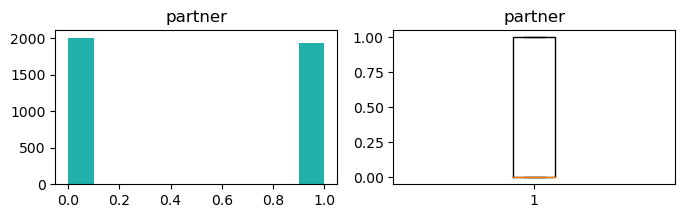

count    3943.000000
mean        0.491250
std         0.499987
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: partner, dtype: float64


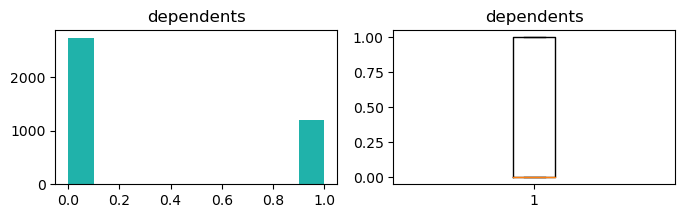

count    3943.000000
mean        0.304844
std         0.460400
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: dependents, dtype: float64


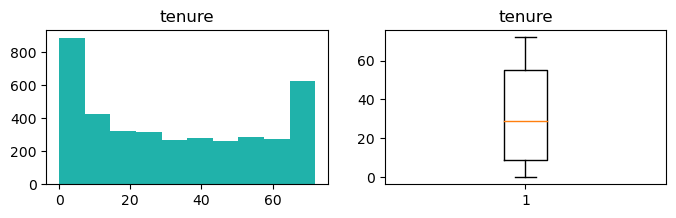

count    3943.000000
mean       32.515851
std        24.542484
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


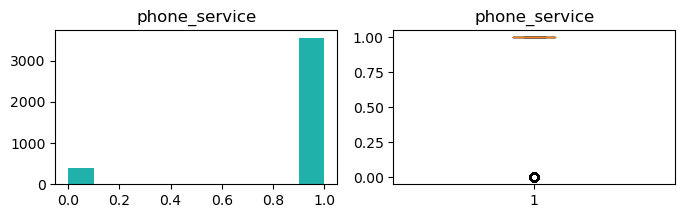

count    3943.000000
mean        0.902612
std         0.296523
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: phone_service, dtype: float64


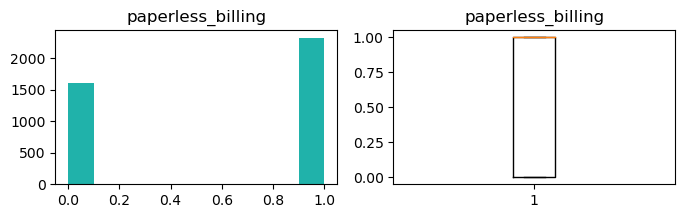

count    3943.000000
mean        0.590921
std         0.491726
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: paperless_billing, dtype: float64


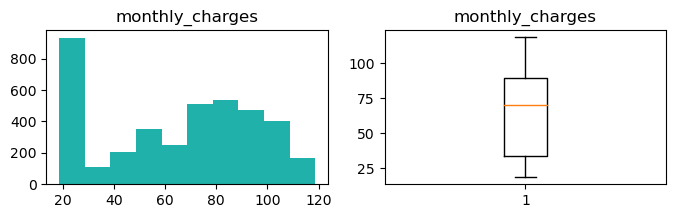

count    3943.000000
mean       64.215191
std        30.196023
min        18.550000
25%        34.000000
50%        70.150000
75%        89.600000
max       118.750000
Name: monthly_charges, dtype: float64


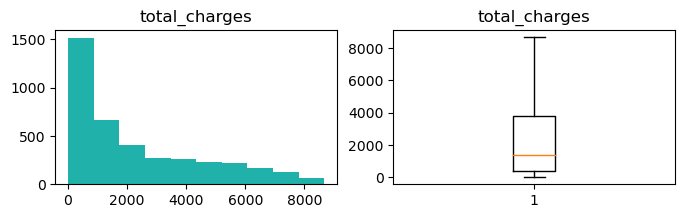

count    3943.000000
mean     2270.874068
std      2258.592385
min         0.000000
25%       385.450000
50%      1386.800000
75%      3809.375000
max      8672.450000
Name: total_charges, dtype: float64


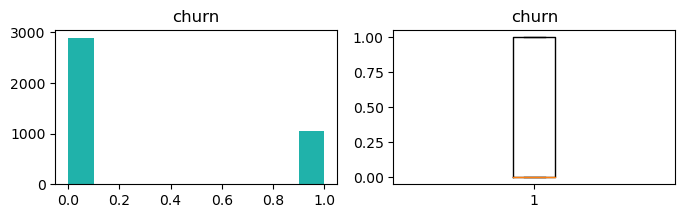

count    3943.000000
mean        0.265280
std         0.441538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: churn, dtype: float64


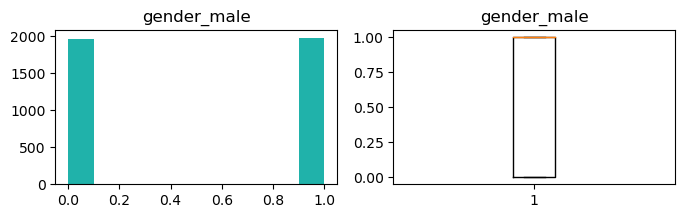

count    3943.000000
mean        0.501902
std         0.500060
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender_male, dtype: float64


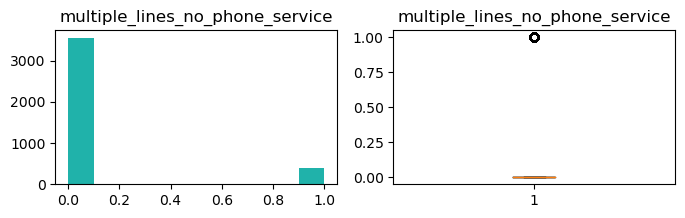

count    3943.000000
mean        0.097388
std         0.296523
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: multiple_lines_no_phone_service, dtype: float64


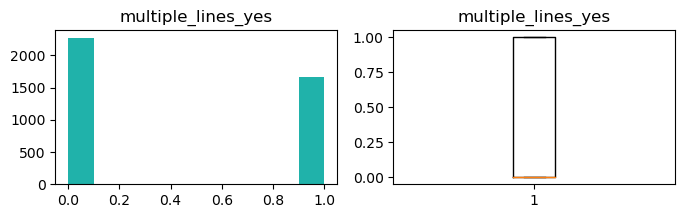

count    3943.000000
mean        0.422775
std         0.494063
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: multiple_lines_yes, dtype: float64


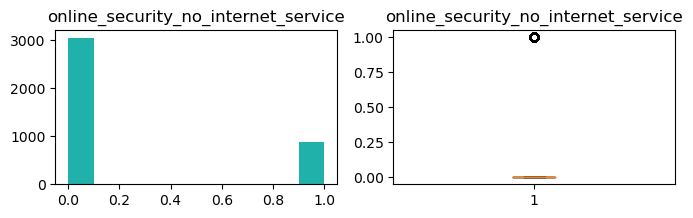

count    3943.000000
mean        0.224195
std         0.417104
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: online_security_no_internet_service, dtype: float64


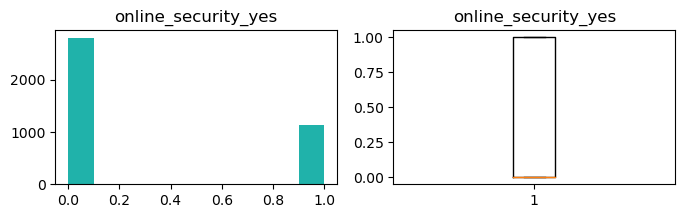

count    3943.000000
mean        0.288866
std         0.453293
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: online_security_yes, dtype: float64


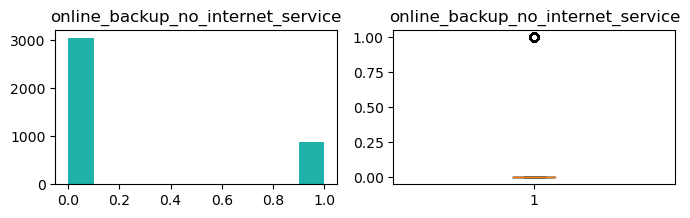

count    3943.000000
mean        0.224195
std         0.417104
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: online_backup_no_internet_service, dtype: float64


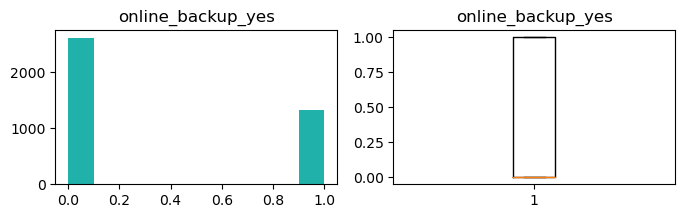

count    3943.000000
mean        0.337307
std         0.472850
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: online_backup_yes, dtype: float64


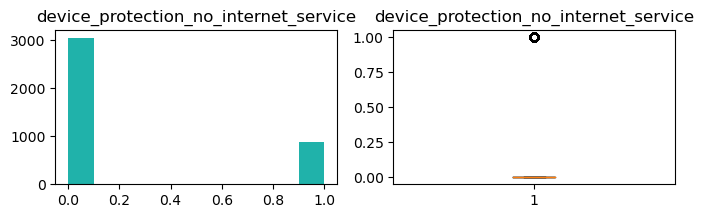

count    3943.000000
mean        0.224195
std         0.417104
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: device_protection_no_internet_service, dtype: float64


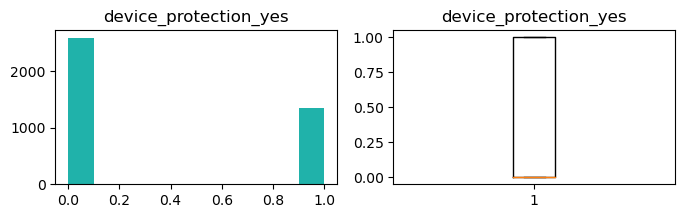

count    3943.000000
mean        0.340857
std         0.474058
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: device_protection_yes, dtype: float64


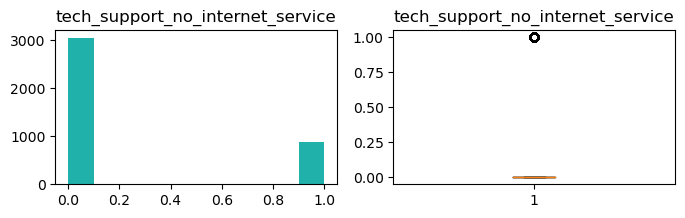

count    3943.000000
mean        0.224195
std         0.417104
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: tech_support_no_internet_service, dtype: float64


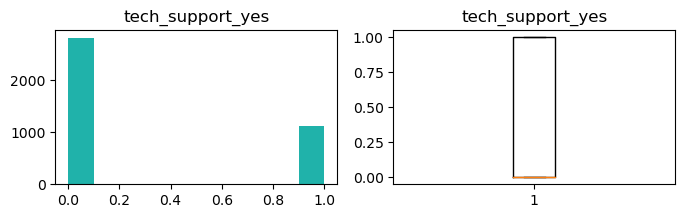

count    3943.000000
mean        0.283794
std         0.450895
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: tech_support_yes, dtype: float64


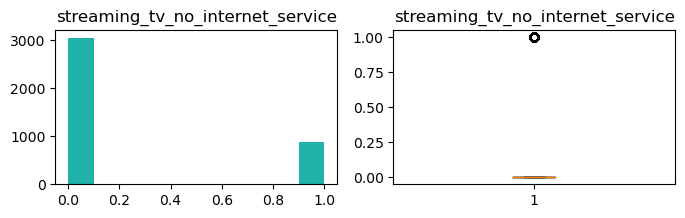

count    3943.000000
mean        0.224195
std         0.417104
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: streaming_tv_no_internet_service, dtype: float64


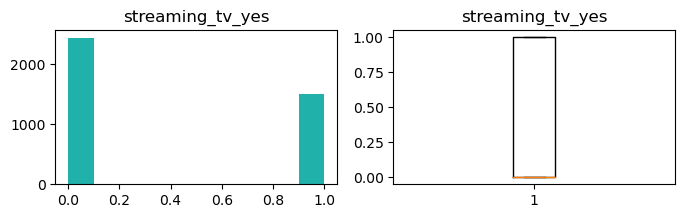

count    3943.000000
mean        0.381689
std         0.485863
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: streaming_tv_yes, dtype: float64


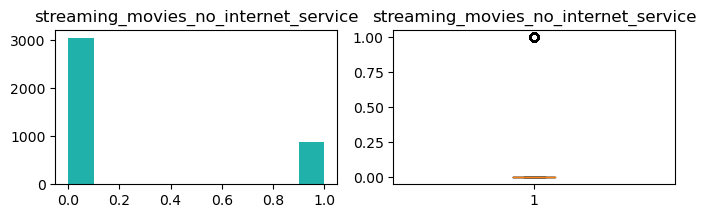

count    3943.000000
mean        0.224195
std         0.417104
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: streaming_movies_no_internet_service, dtype: float64


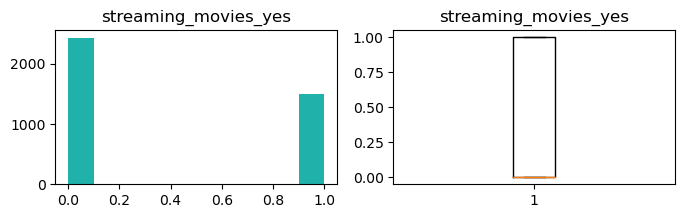

count    3943.000000
mean        0.381943
std         0.485924
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: streaming_movies_yes, dtype: float64


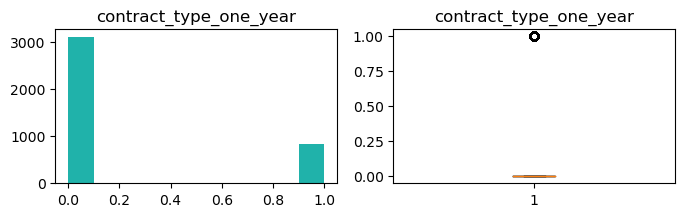

count    3943.000000
mean        0.211007
std         0.408075
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: contract_type_one_year, dtype: float64


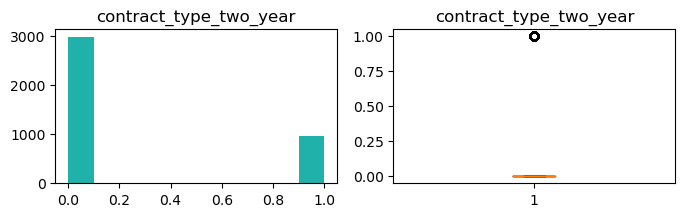

count    3943.000000
mean        0.242455
std         0.428622
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: contract_type_two_year, dtype: float64


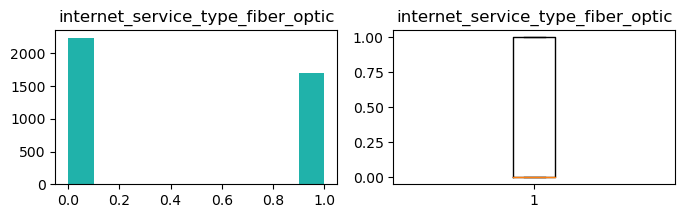

count    3943.000000
mean        0.431905
std         0.495404
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: internet_service_type_fiber_optic, dtype: float64


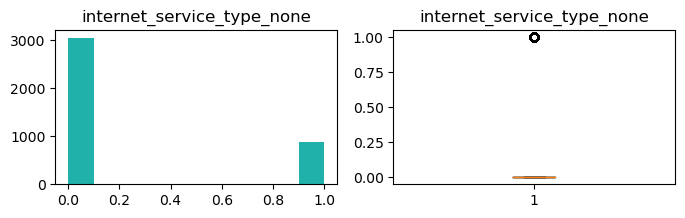

count    3943.000000
mean        0.224195
std         0.417104
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: internet_service_type_none, dtype: float64


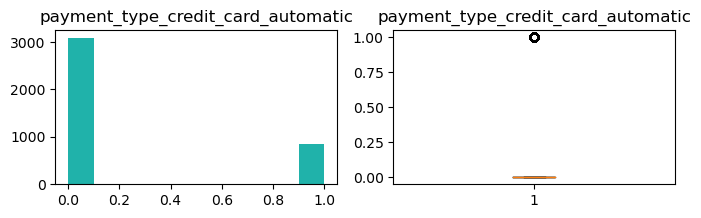

count    3943.000000
mean        0.215318
std         0.411095
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: payment_type_credit_card_automatic, dtype: float64


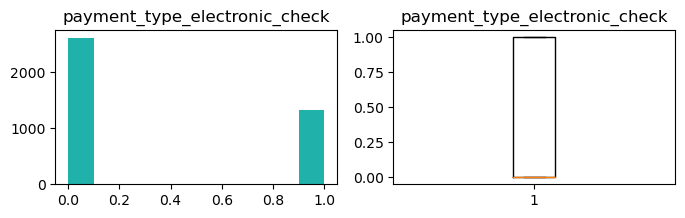

count    3943.000000
mean        0.337053
std         0.472763
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: payment_type_electronic_check, dtype: float64


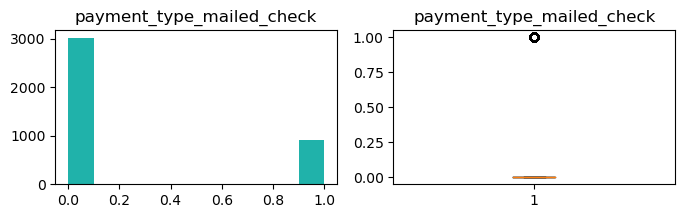

count    3943.000000
mean        0.233071
std         0.422841
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: payment_type_mailed_check, dtype: float64


In [16]:
explore_univariate(train, cat_vars, quant_vars)